In [14]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist

(60000, 28, 28)
9


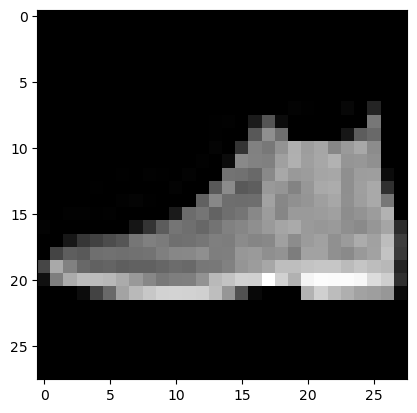

In [15]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
plt.imshow(X_test[0], cmap='grey')
print(y_test[0])            #categoria 9 = stivaletto

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [17]:
#bisogna normalizzare il dataset, divido per il massimo (255)
X_train, X_test = X_train / 255, X_test / 255
print(X_train.max())

1.0


In [18]:
#vediamo le label del target
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
#costruiamo un array per le classi
labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

In [20]:
#problema di classificazione multiclasse -> funz di attiv. softmax per ultimo strato
#bisogna inoltre codificare le label
from keras.utils import to_categorical
y_train_dummies = to_categorical(y_train, 10)
y_test_dummies = to_categorical(y_test, 10)
y_test_dummies[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Creiamo la rete neurale artificiale

In [21]:
#si potrebbe creare un seed per ottenere lo stesso risultato
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))      #ultimo strati con nodi uguali al numero di label da classificare
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])     #stocasthic gradiand descend

Voglio visualizzare come la funzione di costo sia variata ad ogni epoca. Raccolgo i valori della funzione di costo nella classe history:

In [24]:
from keras.callbacks import History

history = History()

model.fit(X_train, y_train_dummies, epochs=100, batch_size=X_train.shape[0], callbacks=[history])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step - accuracy: 0.0649 - loss: 2.3017
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 0.0873 - loss: 2.2726
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - accuracy: 0.1088 - loss: 2.2467
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step - accuracy: 0.1305 - loss: 2.2235
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.1526 - loss: 2.2023
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - accuracy: 0.1727 - loss: 2.1828
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 0.1957 - loss: 2.1645
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - accuracy: 0.2204 - loss: 2.1473
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - accuracy: 0.2474 - loss: 2.1309
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.2724 - loss: 2.1152
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 0.2968 - loss: 2.1000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - accuracy:

Performance molto scarse: troppe poche epoche per un problema complesso

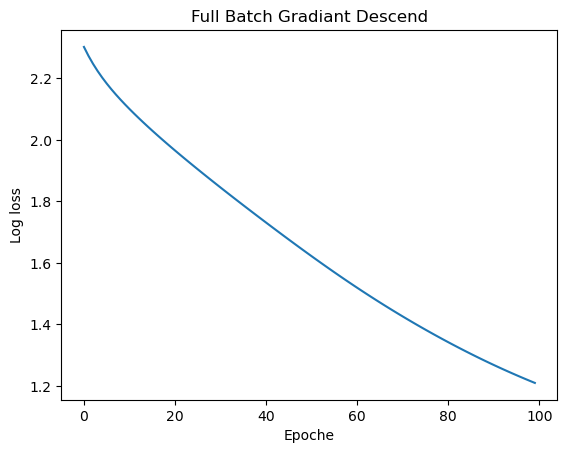

In [26]:
plt.title('Full Batch Gradiant Descend')
plt.xlabel('Epoche')
plt.ylabel('Log loss')
plt.plot(history.history['loss'])

#### Utilizziamo lo stochastic batch gradiant descent

In [29]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))      

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

model.fit(X_train, y_train_dummies, epochs=3, batch_size=1, callbacks=[history])   #modifico il batch size ad 1 e le epoche a 5 sennò troppe

Epoch 1/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - accuracy: 0.7679 - loss: 0.6296
Epoch 2/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - accuracy: 0.8524 - loss: 0.3947
Epoch 3/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - accuracy: 0.8749 - loss: 0.3453


#### Utilizziamo il mini batch gradiant descent

In [31]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))      

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

model.fit(X_train, y_train_dummies, epochs=100, batch_size=512, callbacks=[history]) #modifico il batch size in un range tra 32 a 512 spostandosi a potenze di 2

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3932 - loss: 1.9699
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6942 - loss: 1.0511
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7471 - loss: 0.7962
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7752 - loss: 0.6952
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7928 - loss: 0.6401
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8052 - loss: 0.5932
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8106 - loss: 0.5692
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8186 - loss: 0.5436
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8242 - loss: 0.5252
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8283 - loss: 0.5067
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8282 - loss: 0.5010
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━

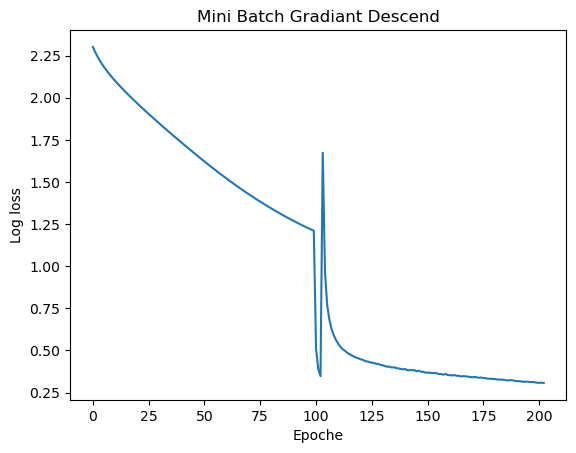

In [33]:
plt.title('Mini Batch Gradiant Descend')
plt.xlabel('Epoche')
plt.ylabel('Log loss')
plt.plot(history.history['loss'])

#### E possibile inizializzare alcuni parametri come il kernel_initializer

In [ ]:
#per evitare l'esplosione o la scomparsa del gradiente (si usa poco)
from keras.initializers import HeNormal

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_initializer=HeNormal())) #funziona bene con relu